In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler




In [7]:
X,Y=make_circles(noise=0.1, factor=0.2, random_state=1)

X1 = X[:, 0].flatten()
X2 = X[:, 1].flatten()
X3 = X1**2 ##Adding Feature Square
X4 = X2**2  #Adding Feature Square
X5 = X3*X4
X6 = 2*X3*X4
X7 = X5**2


#print(X)
df = pd.DataFrame(X, columns = ['X1', 'X2']) 

df['X3'] = X3
df['X4'] = X4
df['X5'] = X5
df['X6'] = X6

print(df)

X = df.as_matrix(columns=["X1", "X2" "X3", "X4","X5","X6","X7"])
print(X)


scaler = StandardScaler()
X = scaler.fit_transform(X)



          X1        X2        X3        X4            X5            X6
0  -0.150995 -0.016031  0.022799  0.000257  5.859112e-06  1.171822e-05
1   0.010808 -0.193696  0.000117  0.037518  4.382442e-06  8.764885e-06
2  -0.465971 -1.066877  0.217129  1.138227  2.471426e-01  4.942851e-01
3  -0.272617  0.002309  0.074320  0.000005  3.961594e-07  7.923188e-07
4   0.319868 -0.054994  0.102316  0.003024  3.094316e-04  6.188631e-04
..       ...       ...       ...       ...           ...           ...
95 -0.187431 -0.112491  0.035130  0.012654  4.445443e-04  8.890887e-04
96  0.276026  0.887306  0.076190  0.787311  5.998546e-02  1.199709e-01
97 -0.277193 -0.200118  0.076836  0.040047  3.077089e-03  6.154178e-03
98  0.268598  1.004521  0.072145  1.009063  7.279849e-02  1.455970e-01
99 -0.224224 -0.904169  0.050276  0.817522  4.110211e-02  8.220423e-02

[100 rows x 6 columns]
[[-1.50994737e-01  2.56985220e-04  5.85911158e-06  1.17182232e-05]
 [ 1.08078193e-02  3.75180340e-02  4.38244244e-06  8.7648

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [8]:

#clf = linear_model.SGDClassifier(loss='log',alpha=0,learning_rate='adaptive',eta0=0.01,max_iter=1000)
clf = linear_model.SGDClassifier(loss='log', random_state=123)
#clf = linear_model.SGDClassifier(loss='log')#,penalty=None,alpha=0.00,eta0=0.0001,learning_rate='constant')
#clf.n_iter = np.ceil(10**6 / len(Y))

clf.fit(X, Y)

predict_Y = clf.predict(X)

prob_Y  = clf.predict_proba(X=X) 

success = 1-sum(abs(predict_Y - Y))/len(Y)
print("Hypothesis prediction success rate is %.2f" %success)

clf.score(X,Y)

Hypothesis prediction success rate is 0.98


0.98

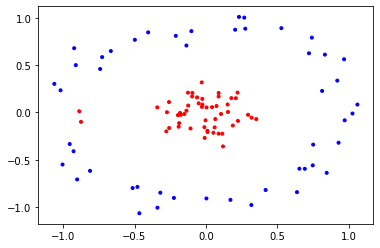

In [4]:
cmap = ListedColormap(['blue', 'red'])                    
plt.scatter(X1,X2, c=predict_Y,marker='.', cmap=cmap)
#plt.scatter(errors,errors, c=errors, marker='*',s=100,edgecolors="black",facecolors="none")
plt.show()

In [9]:
def do_fit_logreg(classifier, X, Y):
    classifier.fit(X, Y)
    predict_y1 = classifier.predict(X=X)
    success = 1-sum(abs(predict_y1 - Y))/len(Y)
    print("Hypothesis prediction success rate is %.2f" %success)
    print(classifier.score(X,Y))
    
    cmap = ListedColormap(['blue', 'red'])                    
    plt.scatter(X1,X2, c=predict_y1,marker='.', cmap=cmap)
    plt.show()

Hypothesis prediction success rate is 0.93
0.93


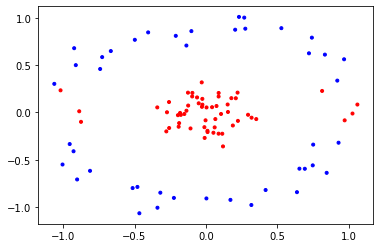

In [10]:
from sklearn.linear_model import LogisticRegression
logregressor = LogisticRegression(solver="liblinear")
do_fit_logreg(logregressor, X, Y) 
